In [179]:
import os, re, sys, wx
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.full as si

import tkinter as tk
from tkinter import filedialog
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
from pprint import pprint

from probeinterface import (Probe, ProbeGroup, get_probe, read_prb)
from probeinterface.plotting import plot_probe, plot_probe_group

In [180]:
if 'filename' in locals():
    pass
else:
    root=tk.Tk()
    root.withdraw()
    filename = filedialog.askdirectory()
    print(repr(filename))
    root.destroy()

In [181]:
recrootDir = filename
expRootDir = (os.path.normpath(filename[:] + '/Record Node 104/experiment1'))
print('experiment directory: ', expRootDir)
exportDir  = filename + os.sep +  '_sorted'
recording = si.read_openephys(expRootDir)
recording

experiment directory:  R:\_Ephys\20220915_RT060_V1\RT060_rec_2022-09-15_15-25-24\Record Node 104\experiment1


c:\Users\ryskt\Anaconda3\envs\rimec\lib\site-packages\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


OpenEphysBinaryRecordingExtractor: 40 channels - 1 segments - 30.0kHz - 5109.282s

In [182]:
import wx
class GUIinput:
    def __init__(self):
        self.frame = wx.Frame(None, -1, "textbox")
        self.frame.SetTitle('Exp. Params.')
        panel_ui = wx.Panel(self.frame, wx.ID_ANY, size=(300, 100)) 

        layout = wx.GridSizer(rows=8, cols=2, gap=(16, 1))
        labels = ['Probe: (poly2_32, poly3_32)', 
                    'Normalize (whiten/quantile/None)', 
                    'Common ref. (average/median/None)', 
                    'band-pass (Low freq.)', 
                    'band-pass (High freq.)', 
                    'Averate-diam.']
        defaults = ['poly3_32', 
                    'whiten', 
                    'average', 
                    '300', 
                    '5000', 
                    '75']

        self.frame.labels = []
        self.frame.tboxes = []
        for k, i in enumerate(labels):
            self.frame.labels.append(wx.StaticText(panel_ui, wx.ID_ANY, labels[k]))
            self.frame.tboxes.append(wx.TextCtrl(panel_ui, wx.ID_ANY, defaults[k]))

        # button        
        self.frame.btn = wx.Button(panel_ui, -1, 'Submit')
        self.frame.btn.Bind(wx.EVT_BUTTON, self.Clicked)

        # layout
        for k, i in enumerate(self.frame.labels):
            layout.Add(i)
            layout.Add(self.frame.tboxes[k])
        layout.Add(self.frame.btn, flag=wx.SHAPED)
        panel_ui.SetSizer(layout)

        self.frame.Show(True)
        self.frame.datas = []
    def Clicked(self,event):
        for i in self.frame.tboxes:
            self.frame.datas.append(i.GetValue())
        self.frame.Close(True)

if 'app' in locals():
    del app
app = wx.App()
guiobj = GUIinput()
# app.SetTopWindow(guiobj.frame)
wx.STAY_ON_TOP
app.MainLoop()
print(guiobj.frame.datas)
preproc_params = guiobj.frame.datas*1

['poly3_32', 'whiten', 'average', '300', '5000', '75']


In [183]:
preproc_params

['poly3_32', 'whiten', 'average', '300', '5000', '75']

In [184]:
mygains = recording.get_channel_gains()
nCh = recording.get_num_channels()
fs = recording.get_sampling_frequency()
offsets = recording.get_channel_offsets()

print('Channel offsets:\r\n', offsets, '\r\n')
print('Channel Gains:\r\n', recording.get_channel_gains(), '\r\n')
print('Channel IDs:\r\n', recording.channel_ids)

ai_inChs  = [s for s in recording.channel_ids if 'CH' in s]
ai_inADCs = [s for s in recording.channel_ids if 'ADC' in s]
nChs = len(ai_inChs)


Channel offsets:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Channel Gains:
 [1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.94999993e-01 1.94999993e-01 1.94999993e-01 1.94999993e-01
 1.52587891e-04 1.52587891e-04 1.52587891e-04 1.52587891e-04
 1.52587891e-04 1.52587891e-04 1.52587891e-04 1.52587891e-04] 

Channel IDs:
 ['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH9' 'CH10' 'CH11'
 'CH12' 'CH13' 'CH14' 'CH15' 'CH16' 'CH17' 'CH18' 'CH19' 'CH20' 'CH21'
 'CH22' 'CH23' 'CH24' 'CH25' 'CH26' 'CH27' 'CH28' 'CH29' 'CH30' 'CH31'
 'C

c:\Users\ryskt\Anaconda3\envs\rimec\lib\site-packages\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


<Figure size 1000x2500 with 0 Axes>

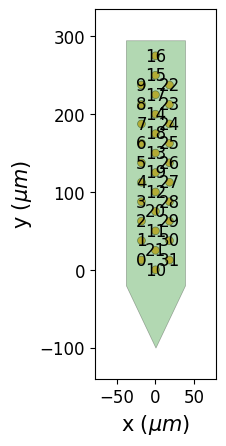

In [185]:
if preproc_params[0] == 'poly3_32':
    prb_two_tetrodes = """
channel_groups = {
0: {
        'channels' : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
        'geometry': {
            0: [-18.0000  ,12.5000],
            1: [-18.0000  ,37.5000],
            2:[-18.0000  ,62.5000],
            3: [-18.0000  ,87.5000],
            4: [-18.0000 ,112.5000],
            5: [-18.0000 ,137.5000],
            6: [-18.0000 ,162.5000],
            7: [-18.0000 ,187.5000],
            8: [-18.0000 ,212.5000],
            9: [-18.0000 ,237.5000],
            10: [       0,         0],
            11: [       0 ,50.0000],
            12: [       0 ,100.0000],
            13: [       0 ,150.0000],
            14: [       0 ,200.0000],
            15: [       0 ,250.0000],
            16: [       0 ,275.0000],
            17: [       0 ,225.0000],
            18: [       0 ,175.0000],
            19: [       0 ,125.0000],
            20: [       0 ,75.0000],
            21: [       0 ,25.0000],
            22: [18.0000 ,237.5000],
            23: [18.0000 ,212.5000],
            24: [18.0000 ,187.5000],
            25: [18.0000 ,162.5000],
            26: [18.0000 ,137.5000],
            27: [18.0000 ,112.5000],
            28: [18.0000  ,87.5000],
            29: [18.0000  ,62.5000],
            30: [18.0000  ,37.5000],
            31: [18.0000  ,12.5000],
        }
},
}
"""

    with open('myPoly3_32.prb', 'w') as f:
            f.write(prb_two_tetrodes)
    myProbe = read_prb('myPoly3_32.prb')
    plt.rcParams["font.size"] = 12


# trimming the ADs
recording_trim = recording.channel_slice(channel_ids=ai_inChs)
recording_trim = recording_trim.set_probes(myProbe)

# plot the results
fig_probe=plt.figure(figsize=[10, 25])
plot_probe_group(myProbe, same_axes=False, with_channel_index=True)
# recording_cmr_wFilt = si.bandpass_filter(recording_trim, freq_min=300, freq_max=10000)
# recording_cmr_wFilt = si.common_reference(recording_cmr_wFilt,
#                                     reference='global', operator='median', ref_channel_ids=ai_inChs) 
# fig1=plt.figure(figsize=[15, 32])
# w_ts = si.plot_timeseries(recording_cmr_wFilt, time_range=(68.5, 70.65), 
#                           figure=fig1, mode='auto',
#                          channel_ids=ai_inChs)
# plt.show()

In [186]:
preproc_params

['poly3_32', 'whiten', 'average', '300', '5000', '75']

c:\Users\ryskt\Anaconda3\envs\rimec\lib\site-packages\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


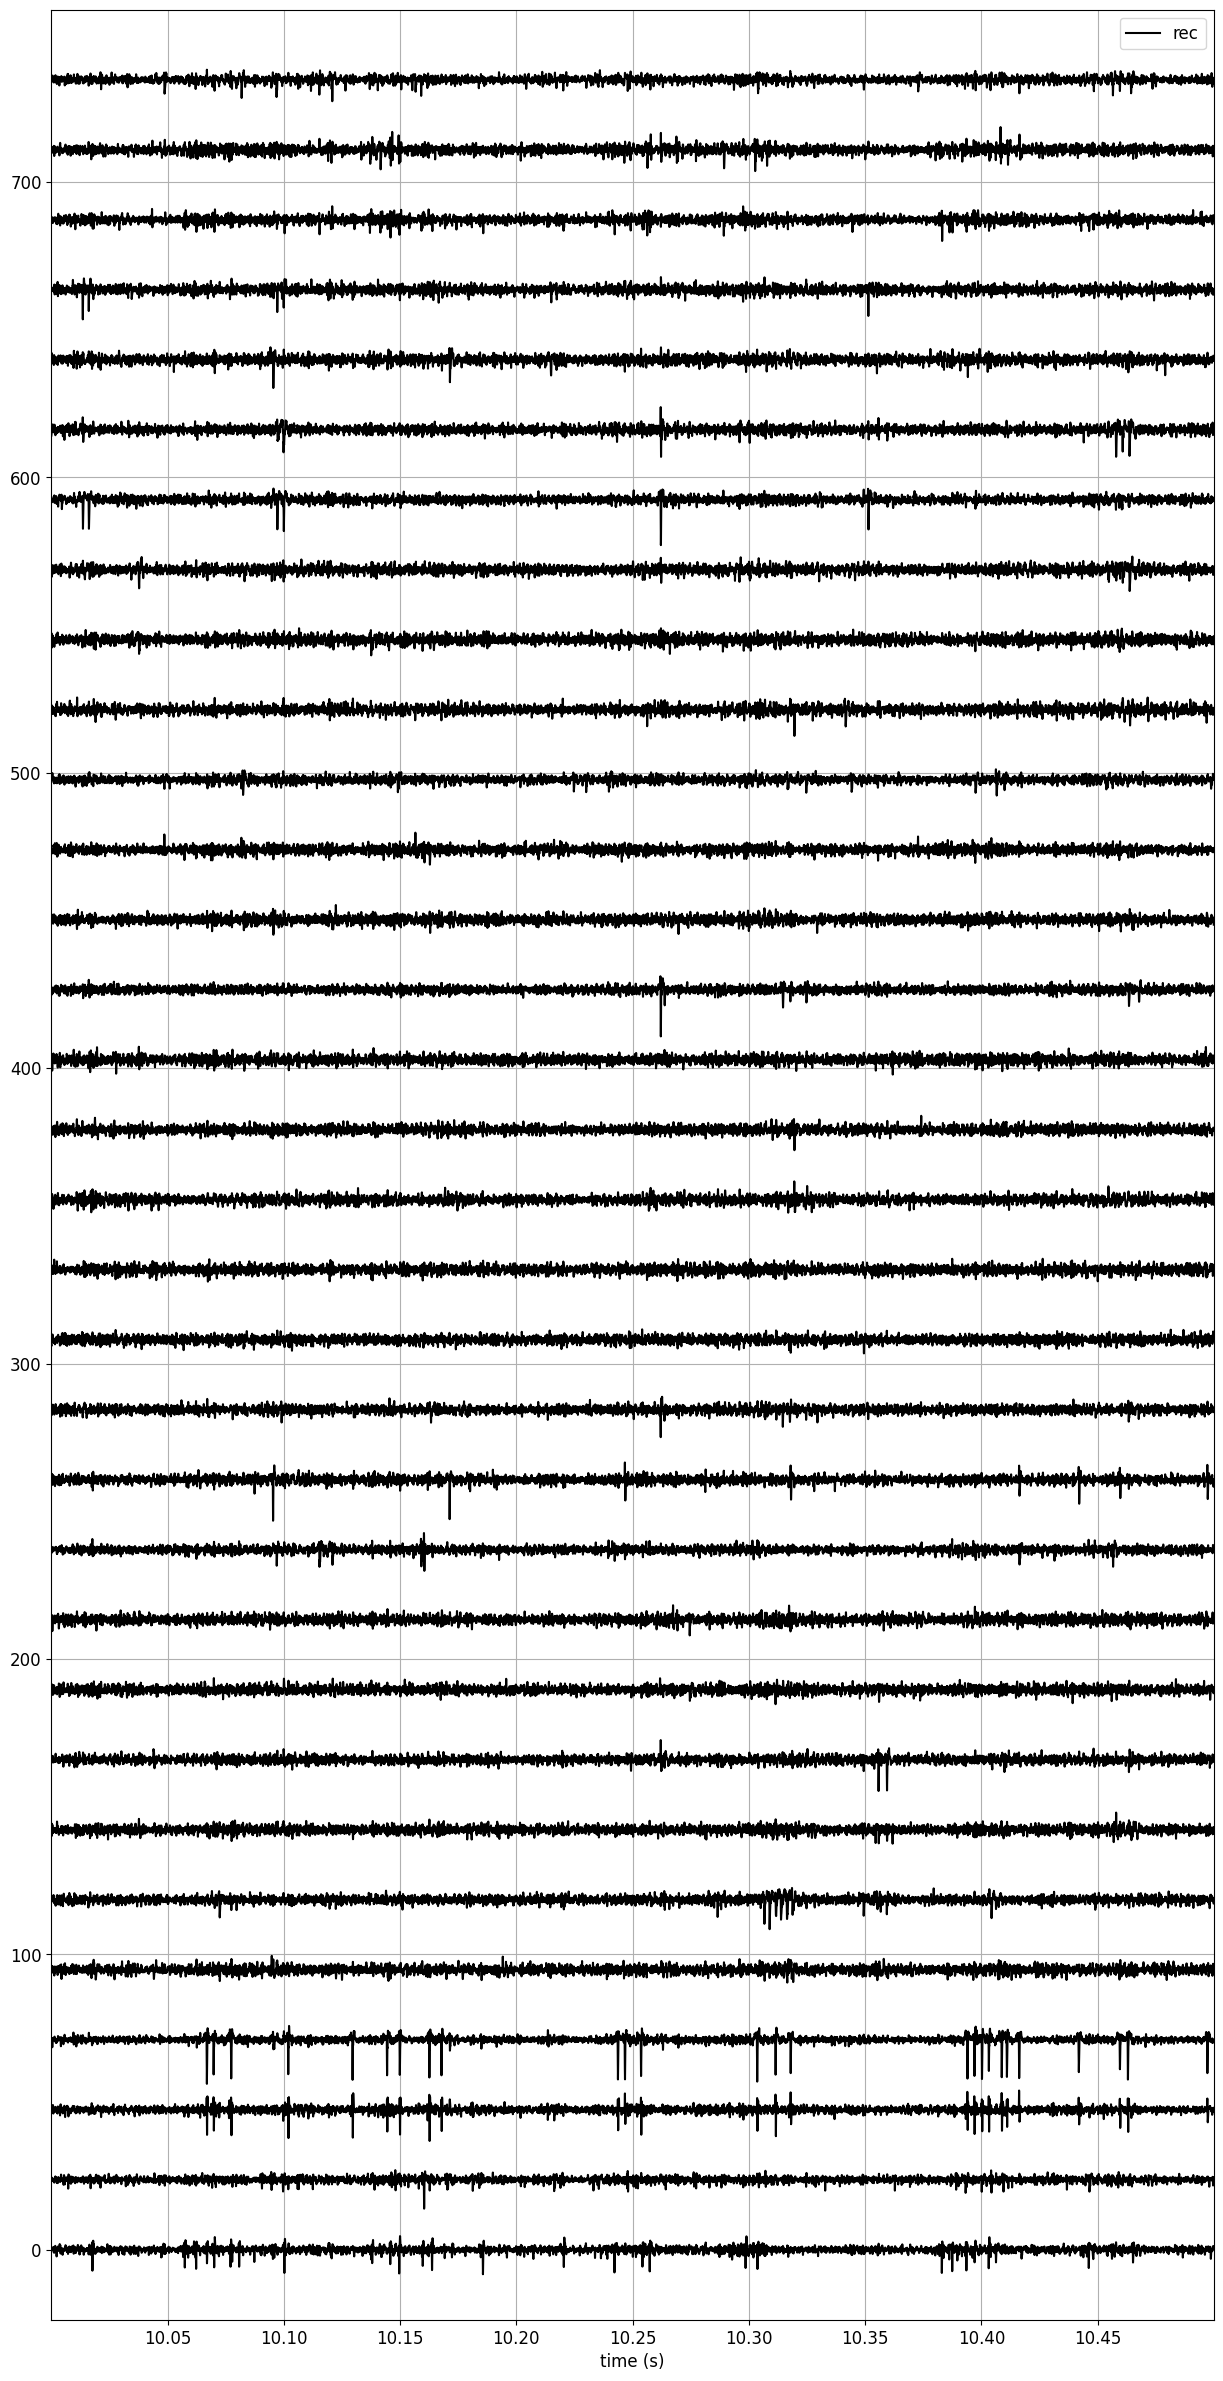

CommonReferenceRecording: 32 channels - 1 segments - 30.0kHz - 5109.282s

In [209]:
recording_trim = recording.channel_slice(channel_ids=ai_inChs)
recording_trim = recording_trim.set_probes(myProbe)
recording_cmr_spike = si.bandpass_filter(recording_trim, 
    freq_min=int(preproc_params[3]), freq_max=int(preproc_params[4]))

# whitening
if preproc_params[1] == 'whiten':
    recording_cmr_spike = si.whiten(recording_cmr_spike)
elif preproc_params[1] == 'quantile':
    recording_cmr_spike = si.normalize_by_quantile(recording_cmr_spike)
else:
    print('no normalization applied')

if preproc_params[2] == 'None':
    pass
else:
    recording_cmr_spike = si.common_reference(recording_cmr_spike,
                                    reference='global', operator=preproc_params[2],
                                    ref_channel_ids=ai_inChs,
                                    local_radius=(int(preproc_params[5]),
                                     int(preproc_params[5]))) 
fig1=plt.figure(figsize=[15, 30])
w_ts = si.plot_timeseries(recording_cmr_spike, time_range=(10.0, 10.5), 
                          figure=fig1, mode='auto',
                         channel_ids=ai_inChs)
plt.grid(True)
plt.show()
recording_cmr_spike

In [210]:
if 'app2' in locals():
    del app2
app2 = wx.PySimpleApp()
dlg = wx.MessageDialog(None,
    'Save binary file?',
    'Message Dialog',
    wx.YES_NO | wx.ICON_QUESTION)
export_flag = dlg.ShowModal()
if export_flag == wx.ID_YES:
    export_flag = True
else:
    export_flag = False
print("Answer:", export_flag)
dlg.Destroy()
export_flag


C:\Users\ryskt\AppData\Local\Temp\ipykernel_30280\2976952659.py:3: wxPyDeprecationWarning: Using deprecated class PySimpleApp. Use :class:`App` instead.
  app2 = wx.PySimpleApp()


Answer: True


True

In [211]:
print(recording_cmr_spike)
if export_flag:
    si.write_binary_recording(recording_cmr_spike, 
        file_paths=recrootDir + os.sep + 
        "preprocessed_data_" + preproc_params[1] + ".dat",
        total_memory='4G', n_jobs=8)

CommonReferenceRecording: 32 channels - 1 segments - 30.0kHz - 5109.282s


In [188]:
return

SyntaxError: 'return' outside function (3438313781.py, line 1)

In [ ]:
sorterName = 'herdingspikes'
if sorterName=="pykilosort":
    import pykilosort
    sorting_res = ss.run_sorter(sorter_name='pykilosort', 
                                recording=recording_cmr_spike,
                                output_folder=exportDir+"_pks", **pk2param, )
elif sorterName=="herdingspikes":
    hdparam = ss.HerdingspikesSorter.default_params()
    print(hdparam)
    sorting_res = ss.run_sorter(sorter_name='herdingspikes', recording=recording_cmr_spike, output_folder=exportDir+"_" + sorterName +"_sorting")
    sorting_res

we = si.extract_waveforms(recording_cmr_spike, sorting_res, exportDir+"_" + sorterName +"_wf_0",
                        load_if_exists=True,
                        ms_before=1, ms_after=2., max_spikes_per_unit=200000,
                        n_jobs=4, chunk_size=30000)

{'clustering_bandwidth': 5.5, 'clustering_alpha': 5.5, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 16, 'clustering_subset': None, 'left_cutout_time': 0.3, 'right_cutout_time': 1.8, 'detect_threshold': 20, 'probe_masked_channels': [], 'probe_inner_radius': 70, 'probe_neighbor_radius': 90, 'probe_event_length': 0.26, 'probe_peak_jitter': 0.2, 't_inc': 100000, 'num_com_centers': 1, 'maa': 12, 'ahpthr': 11, 'out_file_name': 'HS2_detected', 'decay_filtering': False, 'save_all': False, 'amp_evaluation_time': 0.4, 'spk_evaluation_time': 1.0, 'pca_ncomponents': 2, 'pca_whiten': True, 'freq_min': 300.0, 'freq_max': 6000.0, 'filter': True, 'pre_scale': True, 'pre_scale_value': 20.0, 'filter_duplicates': True}


c:\Users\ryskt\Anaconda3\envs\rimec\lib\site-packages\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 30000
# Localization On
# Number of recorded channels: 32
# Analysing frames: 153278464; Seconds: 5109.282133333333
# Frames before spike in cutout: 9
# Frames after spike in cutout: 54
# tcuts: 39 84
# tInc: 100000


(167714, 90, 32)
(35959, 90, 32)
(34215, 90, 32)
(9301, 90, 32)
(7864, 90, 32)
(14871, 90, 32)
(12053, 90, 32)
(12295, 90, 32)
(9015, 90, 32)
(7191, 90, 32)
(5445, 90, 32)
(5792, 90, 32)
(4821, 90, 32)
(6175, 90, 32)
(8040, 90, 32)
(5379, 90, 32)
(5409, 90, 32)
(4847, 90, 32)
(8931, 90, 32)
(3711, 90, 32)
(4891, 90, 32)
(4342, 90, 32)
(5269, 90, 32)
(4767, 90, 32)
(3267, 90, 32)
(3188, 90, 32)
(3224, 90, 32)
(2116, 90, 32)
(1731, 90, 32)
(1225, 90, 32)
(1656, 90, 32)
(1867, 90, 32)
(600, 90, 32)
(1551, 90, 32)
(653, 90, 32)
(1562, 90, 32)
(1193, 90, 32)
(421, 90, 32)


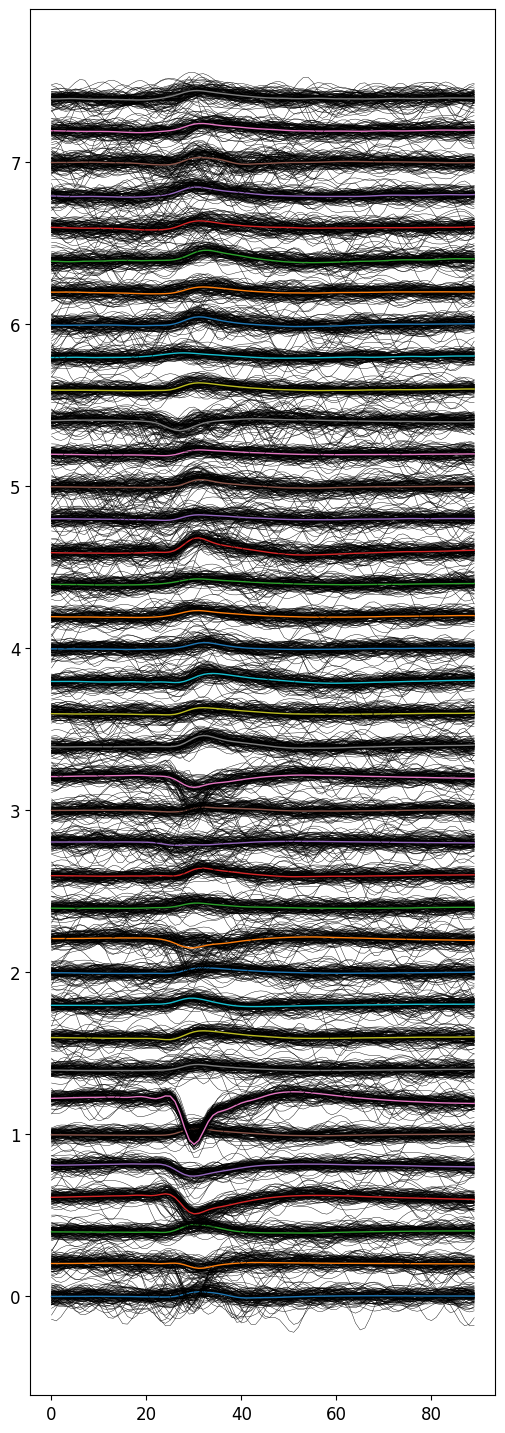

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([4,24])
for i, unit_id in enumerate(sorting_res.unit_ids[:]):
    wf = we.get_waveforms(unit_id)
    print(np.shape(wf))
    template = we.get_template(unit_id)
    ax.plot(i*.2+wf[1:100, :, nChs-1].T, 'k-', lw=0.3)
    ax.plot(i*.2+template[:, nChs-1], lw=1)
fig.set_size_inches(6,18)

In [ ]:
flag_export_phy = True
if flag_export_phy:
    print('Exporting phy...')
    si.export_to_phy(we, exportDir+"_" + sorterName +"_wf_phy", copy_binary=True,
                        total_memory='2G', n_jobs=6)

Exporting phy...
write_binary_recording with n_jobs = 12 and chunk_size = 1302083
Run:
phy template-gui  R:\_Ephys\20220915_RT060_V1\RT060_rec_2022-09-15_15-25-24\_sorted_herdingspikes_wf_phy2\params.py
